# Linear Regression with Python


**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [4]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [10]:
# print the intercept
print(lm.intercept_)

-2640159.7968526958


In [11]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [12]:
predictions = lm.predict(X_test)

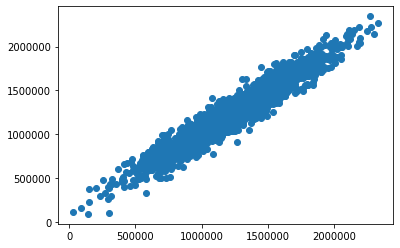

In [13]:
plt.scatter(y_test,predictions)

**Residual Histogram**

/Users/alicekwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
/Users/alicekwon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/alicekwon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be rem

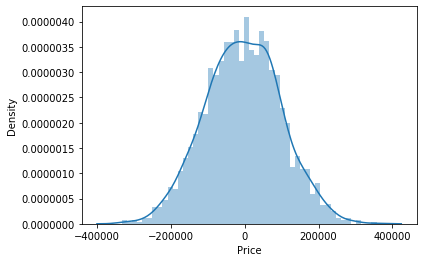

In [14]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [15]:
from sklearn import metrics

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914942
MSE: 10460958907.20898
RMSE: 102278.82922290899


In [29]:
#k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def sklearnModel(X_train, y_train, X_test, y_test):
    '''
    parameters: <list,array or dataframe> X_train training independent vairables 
                <list,array or dataframe> y_train log training dependent variable
                <list,array or dataframe> X_test test independent variables
                <list,array or dataframe> y_test log test dependent variable
    resturns: (R-squared, Mean absolute error, Mean squared error, root-mean squared error)
    '''
    lm.fit(X_train,y_train)
    coefficients = lm.coef_
    constant_term = lm.intercept_
    r_2 = metrics.r2_score(y_test, lm.predict(X_test) )
    mae = metrics.mean_absolute_error(y_test, lm.predict(X_test))
    mse = metrics.mean_squared_error(y_test, lm.predict(X_test))
    adjusted_r_2 = 1 - (1-r_2)*(len(X_train)-1)/(len(X_train)-len(X_train.columns) -1)
    return (r_2,adjusted_r_2, mae, mse, np.sqrt(mse)) 

def kFoldsCrossValidation(df,k, y):
    '''
    parameters: <pandas.dataframe> df, <int> k number of folds, <string> y is dependent variable
    returns: a dataframe containing R-squared, mae, mse, rmse 
    '''
    X = df.drop(y, axis =1)
    Y = df[y]
    kX_df = kFolds(X,k)
    kY_df = kFolds(Y,k)
    result = []
    for i in range(k):
        X_test = kX_df[i]
        X_train = pd.concat([fold for n, fold in enumerate(kX_df) if n!=i]) 
        Y_test = kY_df[i]
        Y_train = pd.concat([fold for n, fold in enumerate(kY_df) if n!=i])
        result.append(sklearnModel(X_train, Y_train, X_test, Y_test))
    return pd.DataFrame(result, columns = ['r_2','adjusted_r_2', 'mae', 'mse', 'rmse'])

    
def kFolds(df,k):
    '''
    parameters: <pandas.datafram> df, <int> k, number of splits
    returns: split dataset into k sliced pieces 
    '''
    fold_size = len(df)//k
    remainder = len(df)%k
    folds = []
    start = 0
    for foldings in range(1,k+1):
        if foldings <= remainder:
            fold = df.iloc[start: start + fold_size + 1]
            folds.append(fold)
            start += fold_size + 1
        else:
            fold =  df.iloc[start : start + fold_size] 
            folds.append(fold)
            start +=  fold_size
    return folds
          
def kFoldEvaluation(df,k,y):
    '''
    parameters:<pandas.dataframe> df, <int> k number of folds, <string> y dependent variable
    returns: average R-squared, mae, mse, rmse  for k-fold cross validation
    '''
    result_df = kFoldsCrossValidation(df,k, y)
    r_2_mean = result_df.r_2.mean()
    adjusted_r_2_mean = result_df.adjusted_r_2.mean()
    mae_mean = result_df.mae.mean()
    mse_mean = result_df.mse.mean()
    rmse_mean = result_df.rmse.mean()
    return (r_2_mean,adjusted_r_2_mean, mae_mean, mse_mean, rmse_mean)


#different method of splitting into k-folds
def kFoldsSklearn(df, k):
    '''
    parameters:<pandas.dataframe> df, <int> k number of folds
    returns: splits into kfold for kfold testing
    '''
    kf = KFold(n_splits = k, shuffle = True, random_state = 2)
    result = next(kf.split(df), None)

    train = df.iloc[result[0]]
    test =  df.iloc[result[1]]
    return (train,test)

#kfold cross validation score
def kFoldCVS(df,k,y):
    '''
    parameters:<pandas.dataframe> df, <int> k number of folds, <string> y dependent variable
    returns: average cross validation score
    '''
    X = df.drop(y, axis =1)
    Y = df[y]
    kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
    cvs = cross_val_score(lm, X, Y, cv = kf)
    return cvs.mean()
    kFoldCVS(new_df,10, 'price')


In [25]:
df = USAhousing.drop("Address", axis = 1)

In [26]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [30]:
kFoldsCrossValidation(df ,10, 'Price')

,r_2,adjusted_r_2,mae,mse,rmse
0,0.913361,0.913265,81385.449943,1.038002e+10,101882.378736
1,0.921124,0.921036,79436.638167,9.774815e+09,98867.663130
2,0.917272,0.917180,87353.383308,1.122997e+10,105971.572720
3,0.923610,0.923525,80970.011966,1.017549e+10,100873.622992
4,0.912476,0.912379,81048.080606,9.979116e+09,99895.524894
5,0.917712,0.917620,78642.445544,9.741077e+09,98696.896625
6,0.916723,0.916630,83526.762895,1.058358e+10,102876.532694
7,0.924879,0.924795,79120.314782,9.738616e+09,98684.426136
8,0.921244,0.921156,80558.305909,1.016605e+10,100826.836850
9,0.905392,0.905287,82237.568665,1.064870e+10,103192.539593


In [31]:
kFoldEvaluation(df,10, 'Price')

(0.9173792621537343,
 0.9172873387693926,
 81427.89617840757,
 10241743744.525496,
 101176.7994371323)

In [33]:
kFoldCVS(df,10, 'Price')

0.917626494743742